In [2]:
# Run if working on Google Colab
from google.colab import drive
import os

# Mount drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/systemic_lupus' # Change the path to the folder stored in Google Drive.

# Files in the folder -
os.listdir(folder_path)

os.chdir(folder_path)

print('Current working directory -', os.getcwd())

Mounted at /content/drive
Current working directory - /content/drive/My Drive/systemic_lupus


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt



In [61]:
# Load the dataset
file_path = 'data/final_data.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

In [62]:
data = data.drop(columns=['ID', 'Unnamed: 0'])

In [63]:

data.head()

,Age at Recruitment,BMI,Physical Activity,Blood Pressure Medication,Cholesterol Lowering Medication,Insulin,label,Experienced Stress,Gender,Family History,Smoking Status,Alcohol Intake
0,60.0,34.31,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0,0
1,54.0,22.62,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,4
2,64.0,23.18,5.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,2
3,47.0,23.54,3.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,3
4,68.0,24.65,3.0,0.0,0.0,0.0,0.0,1,1.0,0.0,0,3


In [64]:
y = data['label']
X = data.drop(columns=['label'])

In [82]:
X.shape

(400115, 11)

In [65]:
y = y.values
X = X.values

In [66]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [67]:
som = MiniSom(
    x=2,  # Number of nodes along the x-axis
    y=2,  # Number of nodes along the y-axis
    input_len=11,  # Dimensionality of the input data
    sigma=1.0,  # Spread of the neighborhood function
    learning_rate=0.5  # Initial learning rate
)

som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

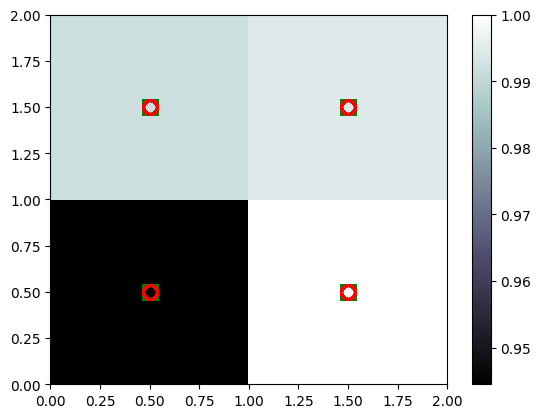

In [68]:
# Making a Self-Organizing Map (SOM)
from pylab import bone, pcolor, colorbar, plot, show

# Initialize the plot
bone()
pcolor(som.distance_map().T)  # Plot the distance map (U-Matrix)
colorbar()  # Add a color bar to the map

# Define markers and colors for different classes or categories
markers = ['o', 's']  # Different marker styles
colors = ['r', 'g']  # Different colors

# Plot data points on the SOM grid
for i, x in enumerate(X):  # Loop through all input data
    w = som.winner(x)  # Get the winning node for the current input
    y_index = int(y[i])  # Ensure y[i] is an integer
    plot(
        w[0] + 0.5, w[1] + 0.5,  # Offset to center the marker
        markers[y_index],  # Marker style based on the class
        markeredgecolor=colors[y_index],  # Edge color based on the class
        markerfacecolor='None',  # Transparent marker fill
        markersize=10,  # Size of the marker
        markeredgewidth=2  # Thickness of the marker edge
    )

# Show the plot
show()



In [69]:
# map data points to their winning neurons
mapped_nodes = [som.winner(x) for x in X]

# add mapped nodes as clusters to dataframe
data['SOM_Cluster'] = mapped_nodes

In [70]:
# group data by som clusters
som_cluster_summary = data.drop(columns=['label']).groupby('SOM_Cluster').mean()
print(som_cluster_summary)

             Age at Recruitment        BMI  Physical Activity  \
SOM_Cluster                                                     
(0, 0)                55.882511  28.121660           2.046868   
(0, 1)                55.526564  27.352704           1.630899   
(1, 0)                57.313926  27.532738           2.052173   
(1, 1)                57.017232  26.602102           1.661019   

             Blood Pressure Medication  Cholesterol Lowering Medication  \
SOM_Cluster                                                               
(0, 0)                        0.244847                         0.233282   
(0, 1)                        0.000000                         0.000000   
(1, 0)                        0.223761                         0.207546   
(1, 1)                        0.000000                         0.000000   

              Insulin  Experienced Stress  Gender  Family History  \
SOM_Cluster                                                         
(0, 0)       0.00197

In [71]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, (2,2))

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


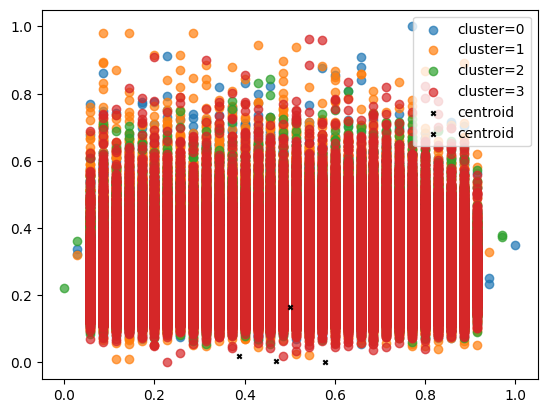

In [72]:
import matplotlib.pyplot as plt


# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 3], marker='x',
                s=10, color='k', label='centroid')
plt.legend();

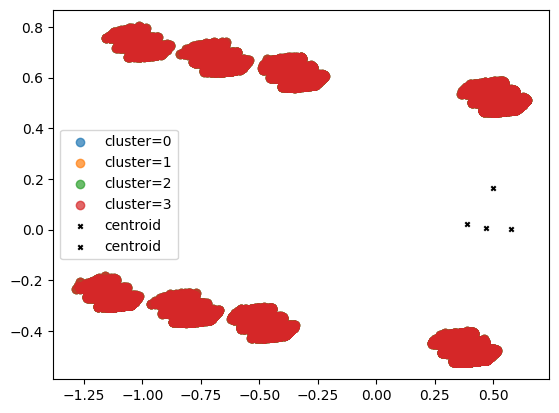

In [73]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
# plt.scatter(, c=kmeans_labels, cmap='viridis', s=50)
# plt.title('K-Means Clusters')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(pca_features[:, 0], pca_features[:, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 3], marker='x',
                s=10, color='k', label='centroid')
plt.legend();

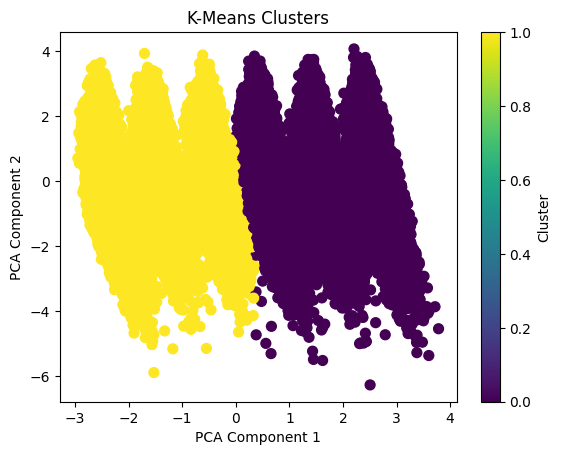

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'data/final_data.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Drop irrelevant columns
data_cleaned = data.drop(columns=['ID', 'Unnamed: 0', 'label'])  # Drop the ID column

# Separate categorical and numerical data
numerical_cols = ['Age at Recruitment', 'Physical Activity', 'BMI']
# categorical_cols = ['Physical Activity', 'Blood Pressure Medication', 'Cholesterol Lowering Medication', 'Insulin', 'Experienced Stress', 'Gender', 'Family History', 'Smoking Status']
categorical_cols = [col for col in data_cleaned.columns if col not in numerical_cols]

# Standardize numerical features
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Combine categorical and numerical data
features = data_cleaned[categorical_cols + numerical_cols].values


# ================================
# K-Means Clustering
# ================================
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(features)

# Add K-Means cluster labels
data['KMeans_Cluster'] = kmeans_labels

# Visualize K-Means clusters with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# data.to_csv('clustered_data.csv', index=False)


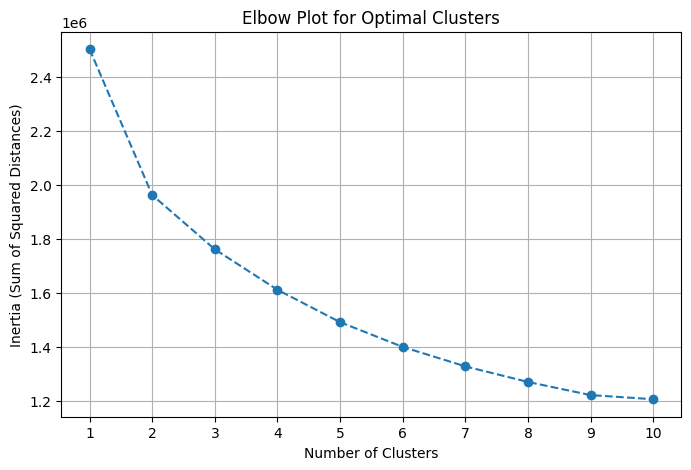

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of cluster numbers to test
cluster_range = range(1, 11)  # Test for clusters from 1 to 10
inertia_values = []

# Calculate inertia for each cluster number
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid()
plt.show()



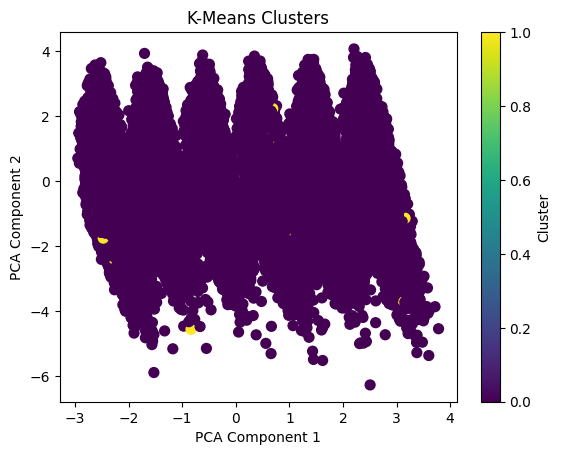

In [76]:
file_path = 'data/final_data.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=data['label'].values, cmap='viridis', s=50)
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


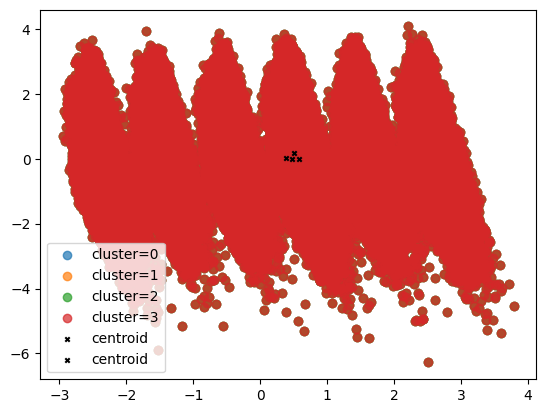

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(X)
# plt.scatter(, c=kmeans_labels, cmap='viridis', s=50)
# plt.title('K-Means Clusters')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
# plt.show()
# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(pca_features[:, 0], pca_features[:, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 3], marker='x',
                s=10, color='k', label='centroid')
plt.legend();

In [36]:
pip install somoclu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595819 sha256=24d139f8fe69108cd54eabebed653dfb941d6ed0e9b0befbb3267d56997e862c
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


In [6]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=ef4c97492b538b13c8acd8135c4ea7ddba8e76cb69ce12cecf46759e49755375
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom
